In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from numpy import mean, std
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.gaussian_process import GaussianProcessClassifier

Using TensorFlow backend.


In [3]:
datasets = pd.read_csv('ecoli.csv')

In [4]:
datasets.index

RangeIndex(start=0, stop=335, step=1)

In [5]:
datasets.columns

Index(['0.49', '0.29', '0.48', '0.50', '0.56', '0.24', '0.35', 'cp'], dtype='object')

In [6]:
datasets.head()

,0.49,0.29,0.48,0.50,0.56,0.24,0.35,cp
0,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
1,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
2,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
3,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
4,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp


In [7]:
datasets = pd.read_csv('ecoli.csv', header = None)

In [8]:
datasets.index

RangeIndex(start=0, stop=336, step=1)

In [9]:
datasets.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [10]:
datasets.head()

,0,1,2,3,4,5,6,7
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [11]:
print("shape of the Datasets is :", datasets.shape)

shape of the Datasets is : (336, 8)


In [12]:
pd.set_option("precision", 3)

In [13]:
datasets.describe()

,0,1,2,3,4,5,6
count,336.000,336.000,336.000,336.000,336.000,336.000,336.000
mean,0.500,0.500,0.495,0.501,0.500,0.500,0.500
std,0.195,0.148,0.088,0.027,0.122,0.216,0.209
min,0.000,0.160,0.480,0.500,0.000,0.030,0.000
25%,0.340,0.400,0.480,0.500,0.420,0.330,0.350
50%,0.500,0.470,0.480,0.500,0.495,0.455,0.430
75%,0.662,0.570,0.480,0.500,0.570,0.710,0.710
max,0.890,1.000,1.000,1.000,0.880,1.000,0.990


In [14]:
target_values = datasets.values[:,-1]
counter = Counter(target_values)

In [15]:
list_cunt = []
class_list = []
percentage_list = []

for key, values in counter.items():
    per = values/len(target_values) * 100
    print("Class =%s, Count=%d, Precentage=%.3f%%"%(key, values, per))
    list_cunt.append(values)
    class_list.append(key)
    percentage_list.append("%.3f%%"%(per))
print("\n\nClass list: ", class_list)   
print("List of the Count values = :",list_cunt)
print("List of the Percentage values = :",percentage_list)
print("Summation of the total values :",np.sum(list_cunt))

Class =cp, Count=143, Precentage=42.560%
Class =im, Count=77, Precentage=22.917%
Class =imS, Count=2, Precentage=0.595%
Class =imL, Count=2, Precentage=0.595%
Class =imU, Count=35, Precentage=10.417%
Class =om, Count=20, Precentage=5.952%
Class =omL, Count=5, Precentage=1.488%
Class =pp, Count=52, Precentage=15.476%


Class list:  ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
List of the Count values = : [143, 77, 2, 2, 35, 20, 5, 52]
List of the Percentage values = : ['42.560%', '22.917%', '0.595%', '0.595%', '10.417%', '5.952%', '1.488%', '15.476%']
Summation of the total values : 336


<Figure size 1440x1296 with 0 Axes>

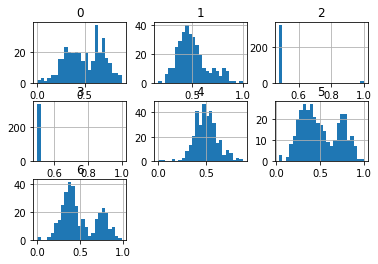

In [16]:
plt.figure(figsize=(20, 18))
datasets.hist(bins = 25)
plt.show()

In [17]:
def load_datasets(full_path):
    datasets = pd.read_csv(full_path, header = None)
    datasets = datasets.values
    X, y = datasets[:, :-1], datasets[:, -1]
    y = LabelEncoder().fit_transform(y)
    return X, y

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3, random_state =1)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    return scores


full_path = 'ecoli.csv'
X, y = load_datasets(full_path)
print(X.shape, y.shape, Counter(y))

(336, 7) (336,) Counter({0: 143, 1: 77, 7: 52, 4: 35, 5: 20, 6: 5, 3: 2, 2: 2})


In [18]:
model = DummyClassifier(strategy='most_frequent')

In [19]:
scores = evaluate_model(X, y, model)
print('Mean Accuracy: %.3f (%.3f)'%(mean(scores), std(scores)))

Mean Accuracy: 0.426 (0.003)


>LDA 0.883 (0.034)
>SVM 0.883 (0.034)
>BAG 0.855 (0.038)
>RF 0.888 (0.028)
>ET 0.880 (0.032)


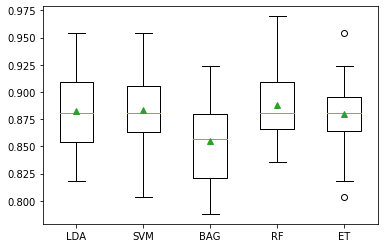

In [20]:
def load_datasetss(full_path):
    datasets = pd.read_csv(full_path, header = None)
    #datasets = datasets.values
    datasets = datasets[datasets[7] != 'imS']
    datasets = datasets[datasets[7] != 'imL']
    data = datasets.values
    X, y = data[:, :-1], data[:,-1]
    y = LabelEncoder().fit_transform(y)
    return X, y

def evalulate(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits= 5, n_repeats = 6, random_state = 1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=-1)
    return scores

# full_path = 'ecoli.csv'
# X, y = load_datasetss(full_path)
# print(X.shape, y.shape, Counter(y))

# scoress = evalulate(X, y, model)
# print('Mean Accuracy: %.3f (%.3f)'%(mean(scoress), std(scoress)))

def get_models():
    models,names = list(),list()
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(LinearSVC())
    names.append('SVM')
    models.append(BaggingClassifier(n_estimators=1000))
    names.append("BAG")
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append("ET")
    return models, names

full_path = 'ecoli.csv'
X, y = load_datasetss(full_path)
models, names = get_models()
results = list()


for i in range(len(models)):
    scores = evalulate(X, y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)'%(names[i], mean(scores), std(scores)))
    
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

/Users/mejbah/opt/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>LR 0.873 (0.035)
>LDA 0.882 (0.033)
>BAG 0.880 (0.035)
>KNN 0.835 (0.037)
>GPC 0.873 (0.038)


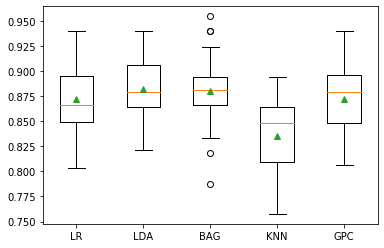

In [21]:
def load_datasetss(full_path):
    datasets = pd.read_csv(full_path, header = None)
    #datasets = datasets.values
    datasets = datasets[datasets[7] != 'imS']
    datasets = datasets[datasets[7] != 'imL']
    data = datasets.values
    X, y = data[:, :-1], data[:,-1]
    y = LabelEncoder().fit_transform(y)
    return X, y

def evalulate(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits= 5, n_repeats = 6, random_state = 1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=-1)
    return scores

# full_path = 'ecoli.csv'
# X, y = load_datasetss(full_path)
# print(X.shape, y.shape, Counter(y))

# scoress = evalulate(X, y, model)
# print('Mean Accuracy: %.3f (%.3f)'%(mean(scoress), std(scoress)))

def get_models():
    models,names = list(),list()
    models.append(LogisticRegression())
    names.append('LR')
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    models.append(LinearSVC())
    names.append("BAG")
    models.append(KNeighborsClassifier(n_neighbors=3))
    names.append('KNN')
    models.append(GaussianProcessClassifier())
    names.append("GPC")
    return models, names

full_path = 'ecoli.csv'
X, y = load_datasetss(full_path)
models, names = get_models()
results = list()


for i in range(len(models)):
    steps = [('o', SMOTE(k_neighbors=2)), ('m',models[i])]
    pipline = Pipeline(steps=steps)
    scores = evalulate(X, y, pipline)
    results.append(scores)
    print('>%s %.3f (%.3f)'%(names[i], mean(scores), std(scores)))
    
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [22]:
def load_datasetss(full_path):
    datasets = pd.read_csv(full_path, header = None)
    #datasets = datasets.values
    datasets = datasets[datasets[7] != 'imS']
    datasets = datasets[datasets[7] != 'imL']
    data = datasets.values
    X, y = data[:, :-1], data[:,-1]
    le = LabelEncoder()
    y = le.fit_transform(y)
    y = LabelEncoder().fit_transform(y)
    return X, y,  le

In [23]:
full_path = 'ecoli.csv'
x, y, le = load_datasetss(full_path)
model = RandomForestClassifier(n_estimators=1000)
model.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
#row = [0.49, 0.29, 0.48, 0.50,0.56, 0.20, 0.35]
a = list(np.random.rand(7))
b = list()
for i in a:
    b.append(float("%.2f"%i))
yhat = model.predict([b])
label = le.inverse_transform(yhat)[0]
print("The Random Generated Number is :",b)
print('The label is :', class_list)
print('The maximum value from the generated values at index :',b.index(max(b)), ', And the values is : ',max(b))
print('We predicted  = %s '%(label),', And we expect',"\'",class_list[b.index(max(b))],"\'",'label')
if label == class_list[b.index(max(b))]:
    print('The Accuracy is : 100%')
else:
    print('This model has low Accuracy')

The Random Generated Number is : [0.73, 0.0, 0.03, 0.7, 0.13, 0.16, 0.56]
The label is : ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
The maximum value from the generated values at index : 0 , And the values is :  0.73
We predicted  = cp  , And we expect ' cp ' label
The Accuracy is : 100%


In [58]:
#row = [0.49, 0.29, 0.48, 0.50,0.56, 0.20, 0.35]
a = list(np.random.rand(7))
b = list()
for i in a:
    b.append(float("%.2f"%i))
yhat = model.predict([b])
label = le.inverse_transform(yhat)[0]
print("The Random Generated Number is :",b)
print('The label is :', class_list)
print('The maximum value from the generated values at index :',b.index(max(b)), ', And the values is : ',max(b))
print('We predicted  = %s '%(label),', And we expect',"\'",class_list[b.index(max(b))],"\'",'label')
if label == class_list[b.index(max(b))]:
    print('The Accuracy is : 100%')
else:
    print('This model has low Accuracy')

The Random Generated Number is : [0.02, 0.76, 0.27, 0.64, 0.1, 0.3, 0.33]
The label is : ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
The maximum value from the generated values at index : 1 , And the values is :  0.76
We predicted  = cp  , And we expect ' im ' label
This model has low Accuracy


In [59]:
#row = [0.49, 0.29, 0.48, 0.50,0.56, 0.20, 0.35]
a = list(np.random.rand(7))
b = list()
for i in a:
    b.append(float("%.2f"%i))
yhat = model.predict([b])
label = le.inverse_transform(yhat)[0]
print("The Random Generated Number is :",b)
print('The label is :', class_list)
print('The maximum value from the generated values at index :',b.index(max(b)), ', And the values is : ',max(b))
print('We predicted  = %s '%(label),', And we expect',"\'",class_list[b.index(max(b))],"\'",'label')
if label == class_list[b.index(max(b))]:
    print('The Accuracy is : 100%')
else:
    print('This model has low Accuracy')

The Random Generated Number is : [0.0, 0.43, 0.45, 0.41, 0.7, 0.43, 0.84]
The label is : ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
The maximum value from the generated values at index : 6 , And the values is :  0.84
We predicted  = im  , And we expect ' omL ' label
This model has low Accuracy


In [60]:
#row = [0.49, 0.29, 0.48, 0.50,0.56, 0.20, 0.35]
a = list(np.random.rand(7))
b = list()
for i in a:
    b.append(float("%.2f"%i))
yhat = model.predict([b])
label = le.inverse_transform(yhat)[0]
print("The Random Generated Number is :",b)
print('The label is :', class_list)
print('The maximum value from the generated values at index :',b.index(max(b)), ', And the values is : ',max(b))
print('We predicted  = %s '%(label),', And we expect',"\'",class_list[b.index(max(b))],"\'",'label')
if label == class_list[b.index(max(b))]:
    print('The Accuracy is : 100%')
else:
    print('This model has low Accuracy')

The Random Generated Number is : [0.47, 0.86, 0.23, 0.29, 0.88, 0.4, 0.73]
The label is : ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
The maximum value from the generated values at index : 4 , And the values is :  0.88
We predicted  = im  , And we expect ' imU ' label
This model has low Accuracy


In [61]:
#row = [0.49, 0.29, 0.48, 0.50,0.56, 0.20, 0.35]
a = list(np.random.rand(7))
b = list()
for i in a:
    b.append(float("%.2f"%i))
yhat = model.predict([b])
label = le.inverse_transform(yhat)[0]
print("The Random Generated Number is :",b)
print('The label is :', class_list)
print('The maximum value from the generated values at index :',b.index(max(b)), ', And the values is : ',max(b))
print('We predicted  = %s '%(label),', And we expect',"\'",class_list[b.index(max(b))],"\'",'label')
if label == class_list[b.index(max(b))]:
    print('The Accuracy is : 100%')
else:
    print('This model has low Accuracy')

The Random Generated Number is : [0.83, 0.33, 0.24, 0.77, 0.75, 0.3, 0.73]
The label is : ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
The maximum value from the generated values at index : 0 , And the values is :  0.83
We predicted  = imU  , And we expect ' cp ' label
This model has low Accuracy


In [62]:
#row = [0.49, 0.29, 0.48, 0.50,0.56, 0.20, 0.35]
a = list(np.random.rand(7))
b = list()
for i in a:
    b.append(float("%.2f"%i))
yhat = model.predict([b])
label = le.inverse_transform(yhat)[0]
print("The Random Generated Number is :",b)
print('The label is :', class_list)
print('The maximum value from the generated values at index :',b.index(max(b)), ', And the values is : ',max(b))
print('We predicted  = %s '%(label),', And we expect',"\'",class_list[b.index(max(b))],"\'",'label')
if label == class_list[b.index(max(b))]:
    print('The Accuracy is : 100%')
else:
    print('This model has low Accuracy')

The Random Generated Number is : [0.83, 0.62, 0.76, 0.28, 0.69, 0.93, 0.4]
The label is : ['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp']
The maximum value from the generated values at index : 5 , And the values is :  0.93
We predicted  = om  , And we expect ' om ' label
The Accuracy is : 100%
